In [2]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('./merged_brand_stats_2023_with_cluster.csv')

In [4]:
df.head()

,index,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,...,가맹사업개시일,신규가맹점등록비율,계약종료비율,계약해지비율,상호변경비율,면적당창업비용,수익대비창업비율,추정폐점수,폐점율,클러스터
0,2,2023,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,...,20191230.0,0.428571,0.285714,0.0,0.0,3.248355,0.130654,10,0.285714,1
1,3,2023,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,...,20200815.0,0.250000,0.250000,0.0,0.0,5.287764,0.114568,2,0.250000,1
2,4,2023,외식,한식,㈜소부상회,동양족발,17,3,2,0,...,20200101.0,0.176471,0.117647,0.0,0.0,2.958225,0.237321,2,0.117647,1
3,6,2023,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,...,20130221.0,0.062500,0.187500,0.0,0.0,9.074522,0.235882,3,0.187500,1
4,9,2023,외식,한식,(주)동래정에프앤비,동래정 백탄직화,15,14,0,0,...,20201201.0,0.933333,0.000000,0.0,0.0,4.419571,0.160271,0,0.000000,0


In [5]:
df.shape

(2728, 34)

In [6]:
df.drop(columns=['index',	'기준연도'], inplace=True)
df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,...,가맹사업개시일,신규가맹점등록비율,계약종료비율,계약해지비율,상호변경비율,면적당창업비용,수익대비창업비율,추정폐점수,폐점율,클러스터
0,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,...,20191230.0,0.428571,0.285714,0.0,0.0,3.248355,0.130654,10,0.285714,1
1,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,...,20200815.0,0.250000,0.250000,0.0,0.0,5.287764,0.114568,2,0.250000,1
2,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,...,20200101.0,0.176471,0.117647,0.0,0.0,2.958225,0.237321,2,0.117647,1
3,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,...,20130221.0,0.062500,0.187500,0.0,0.0,9.074522,0.235882,3,0.187500,1
4,외식,한식,(주)동래정에프앤비,동래정 백탄직화,15,14,0,0,0,789601,...,20201201.0,0.933333,0.000000,0.0,0.0,4.419571,0.160271,0,0.000000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   업종대분류       2728 non-null   object 
 1   업종중분류       2728 non-null   object 
 2   법인명         2728 non-null   object 
 3   브랜드명        2728 non-null   object 
 4   가맹점수        2728 non-null   int64  
 5   신규가맹점등록수    2728 non-null   int64  
 6   계약만료수       2728 non-null   int64  
 7   계약해지수       2728 non-null   int64  
 8   상호변경수       2728 non-null   int64  
 9   연평균매출액      2728 non-null   int64  
 10  단위면적당평균매출액  2728 non-null   int64  
 11  보증금         2728 non-null   float64
 12  교육비         2728 non-null   float64
 13  보험료         2728 non-null   float64
 14  기타비용        2728 non-null   float64
 15  총창업비용       2728 non-null   float64
 16  브랜드관리번호     2728 non-null   object 
 17  본사관리번호      2728 non-null   object 
 18  사업자등록번호     2728 non-null   float64
 19  법인등록번호      2728 non-null  

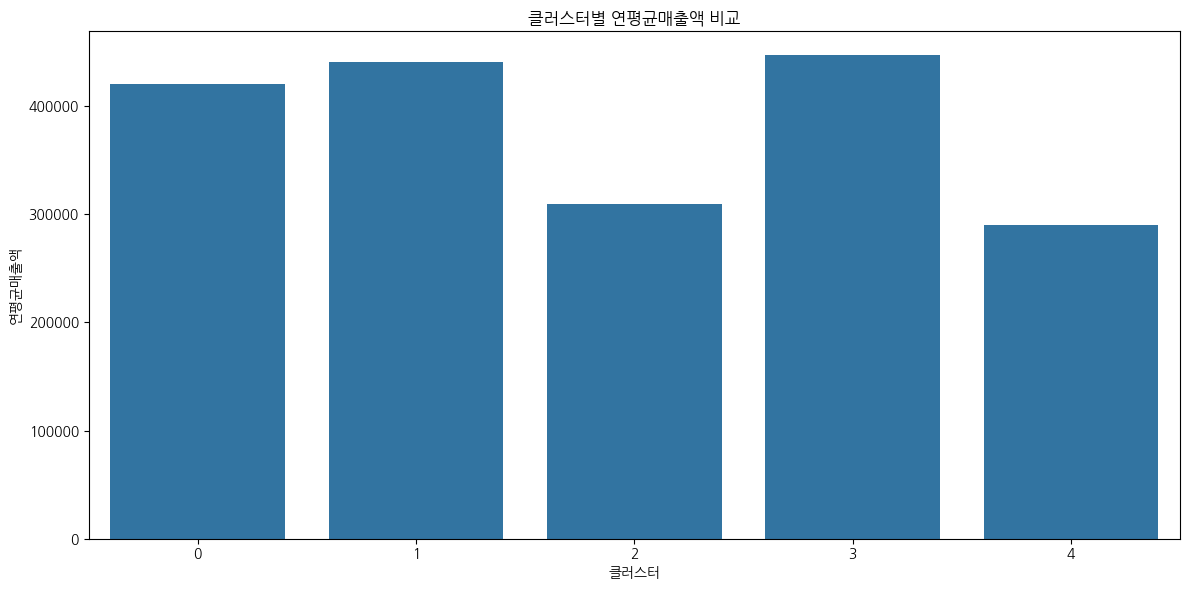

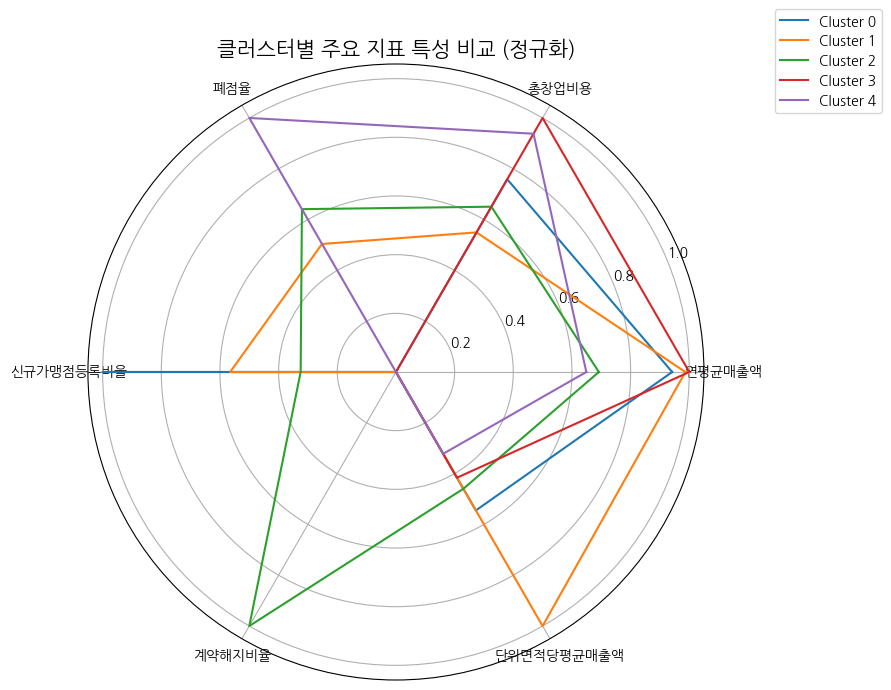

In [ ]:

# 1. 클러스터별로 그룹화하여 주요 수치형 변수의 평균 계산
numeric_columns = [
    '가맹점수', '신규가맹점등록수', '계약만료수', '계약해지수', '상호변경수', '연평균매출액', 
    '단위면적당평균매출액', '보증금', '교육비', '보험료', '기타비용', '총창업비용', 
    '신규가맹점등록비율', '계약종료비율', '계약해지비율', '상호변경비율', '면적당창업비용', 
    '수익대비창업비율', '추정폐점수', '폐점율'
]

cluster_grouped = df.groupby('클러스터')[numeric_columns].mean().reset_index()

# 2. 클러스터별 평균 지표 시각화 
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_grouped, x='클러스터', y='연평균매출액')
plt.title('클러스터별 연평균매출액 비교')
plt.ylabel('연평균매출액')
plt.xlabel('클러스터')
plt.tight_layout()
plt.show()

# 3. 레이더 차트
from math import pi


features = ['연평균매출액', '총창업비용', '폐점율', '신규가맹점등록비율', '계약해지비율', '단위면적당평균매출액']
cluster_radar = cluster_grouped[features]

# 정규화 (0~1 사이)
cluster_radar_normalized = cluster_radar / cluster_radar.max()

# 레이더 차트
num_vars = len(features)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # loop

plt.figure(figsize=(8, 8))
for idx, row in cluster_radar_normalized.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {idx}')
plt.xticks(angles[:-1], features, fontsize=10)
plt.title('클러스터별 주요 지표 특성 비교 (정규화)', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


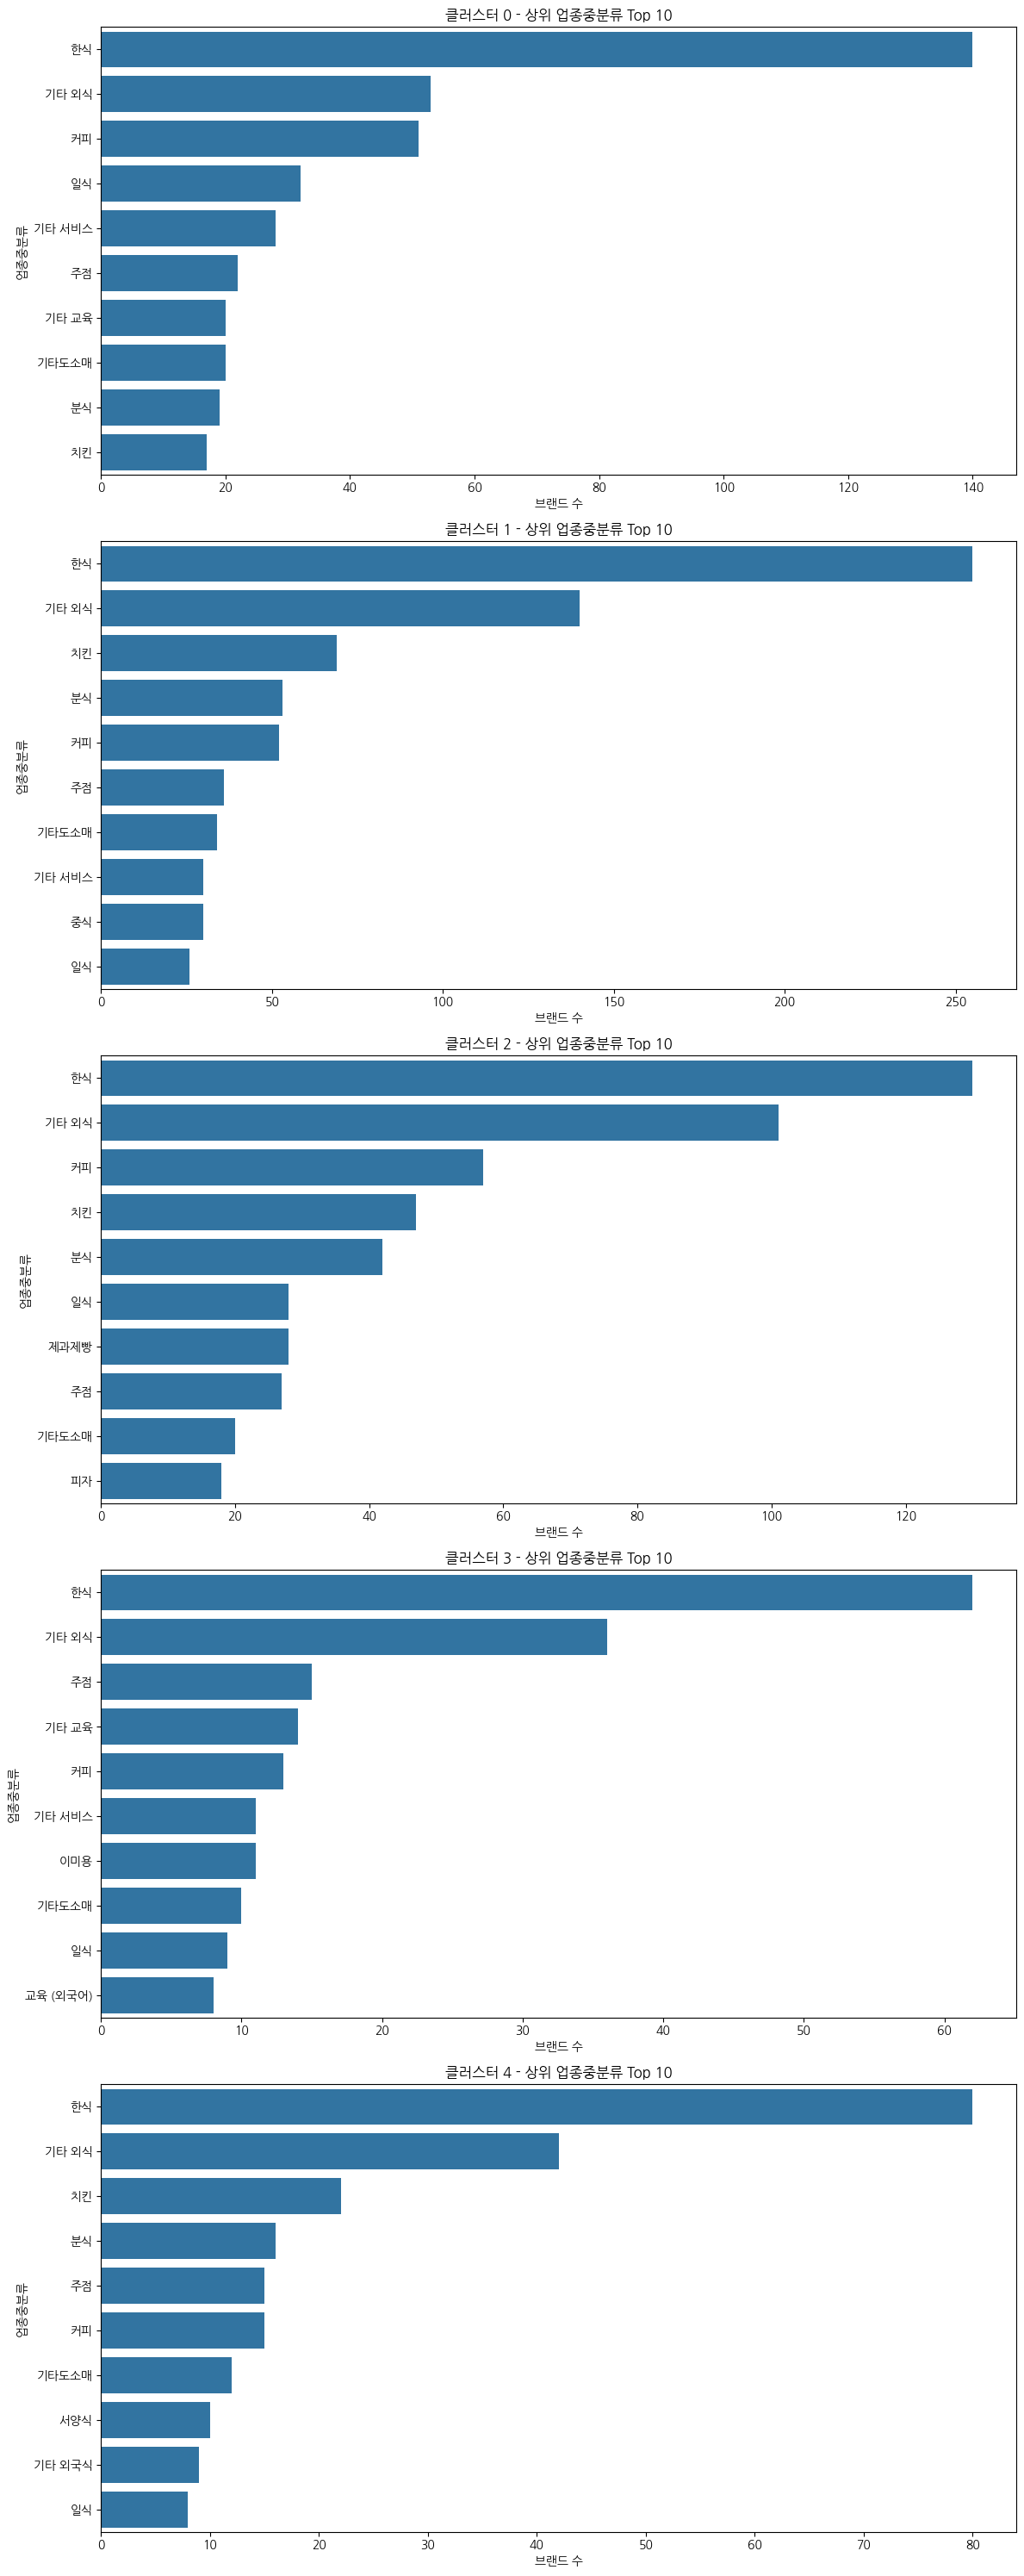

In [ ]:
# 클러스터와 업종중분류 수 조합 카운트
cluster_category_count = df.groupby(['클러스터', '업종중분류']).size().reset_index(name='count')

unique_clusters = df['클러스터'].unique()
num_clusters = len(unique_clusters)

# 플롯 구성
fig, axes = plt.subplots(num_clusters, 1, figsize=(12, 6 * num_clusters), sharex=False)

for i, cluster in enumerate(sorted(unique_clusters)):
    subset = cluster_category_count[cluster_category_count['클러스터'] == cluster]
    top_categories = subset.nlargest(10, 'count')
    
    sns.barplot(data=top_categories, x='count', y='업종중분류', ax=axes[i])
    axes[i].set_title(f'클러스터 {cluster} - 상위 업종중분류 Top 10')
    axes[i].set_xlabel('브랜드 수')
    axes[i].set_ylabel('업종중분류')

plt.tight_layout()
plt.show()


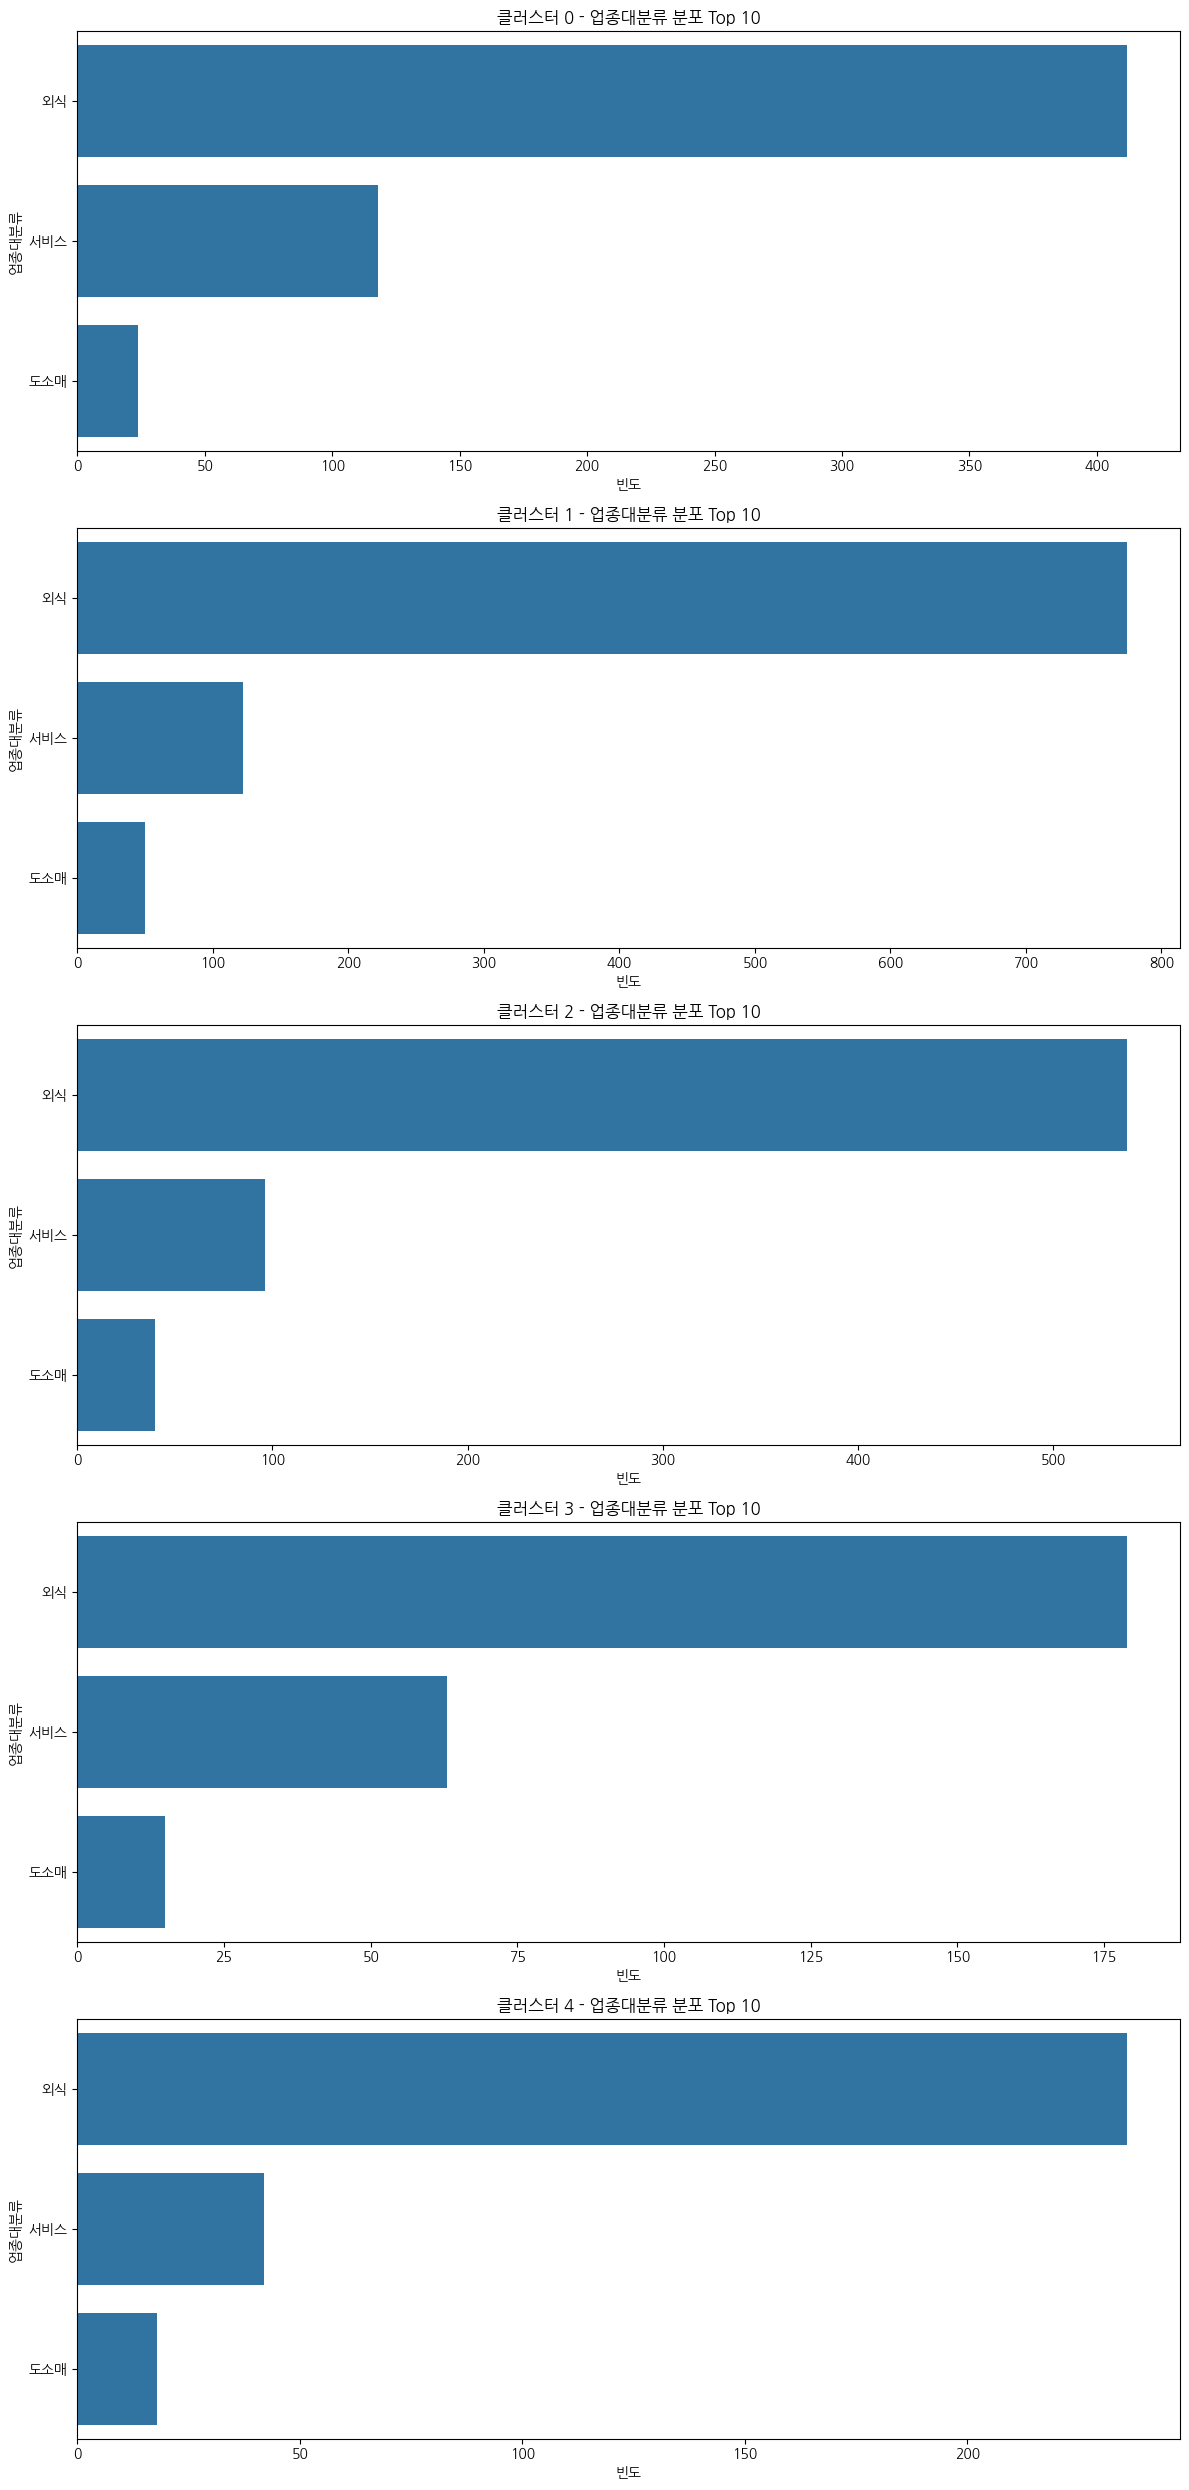

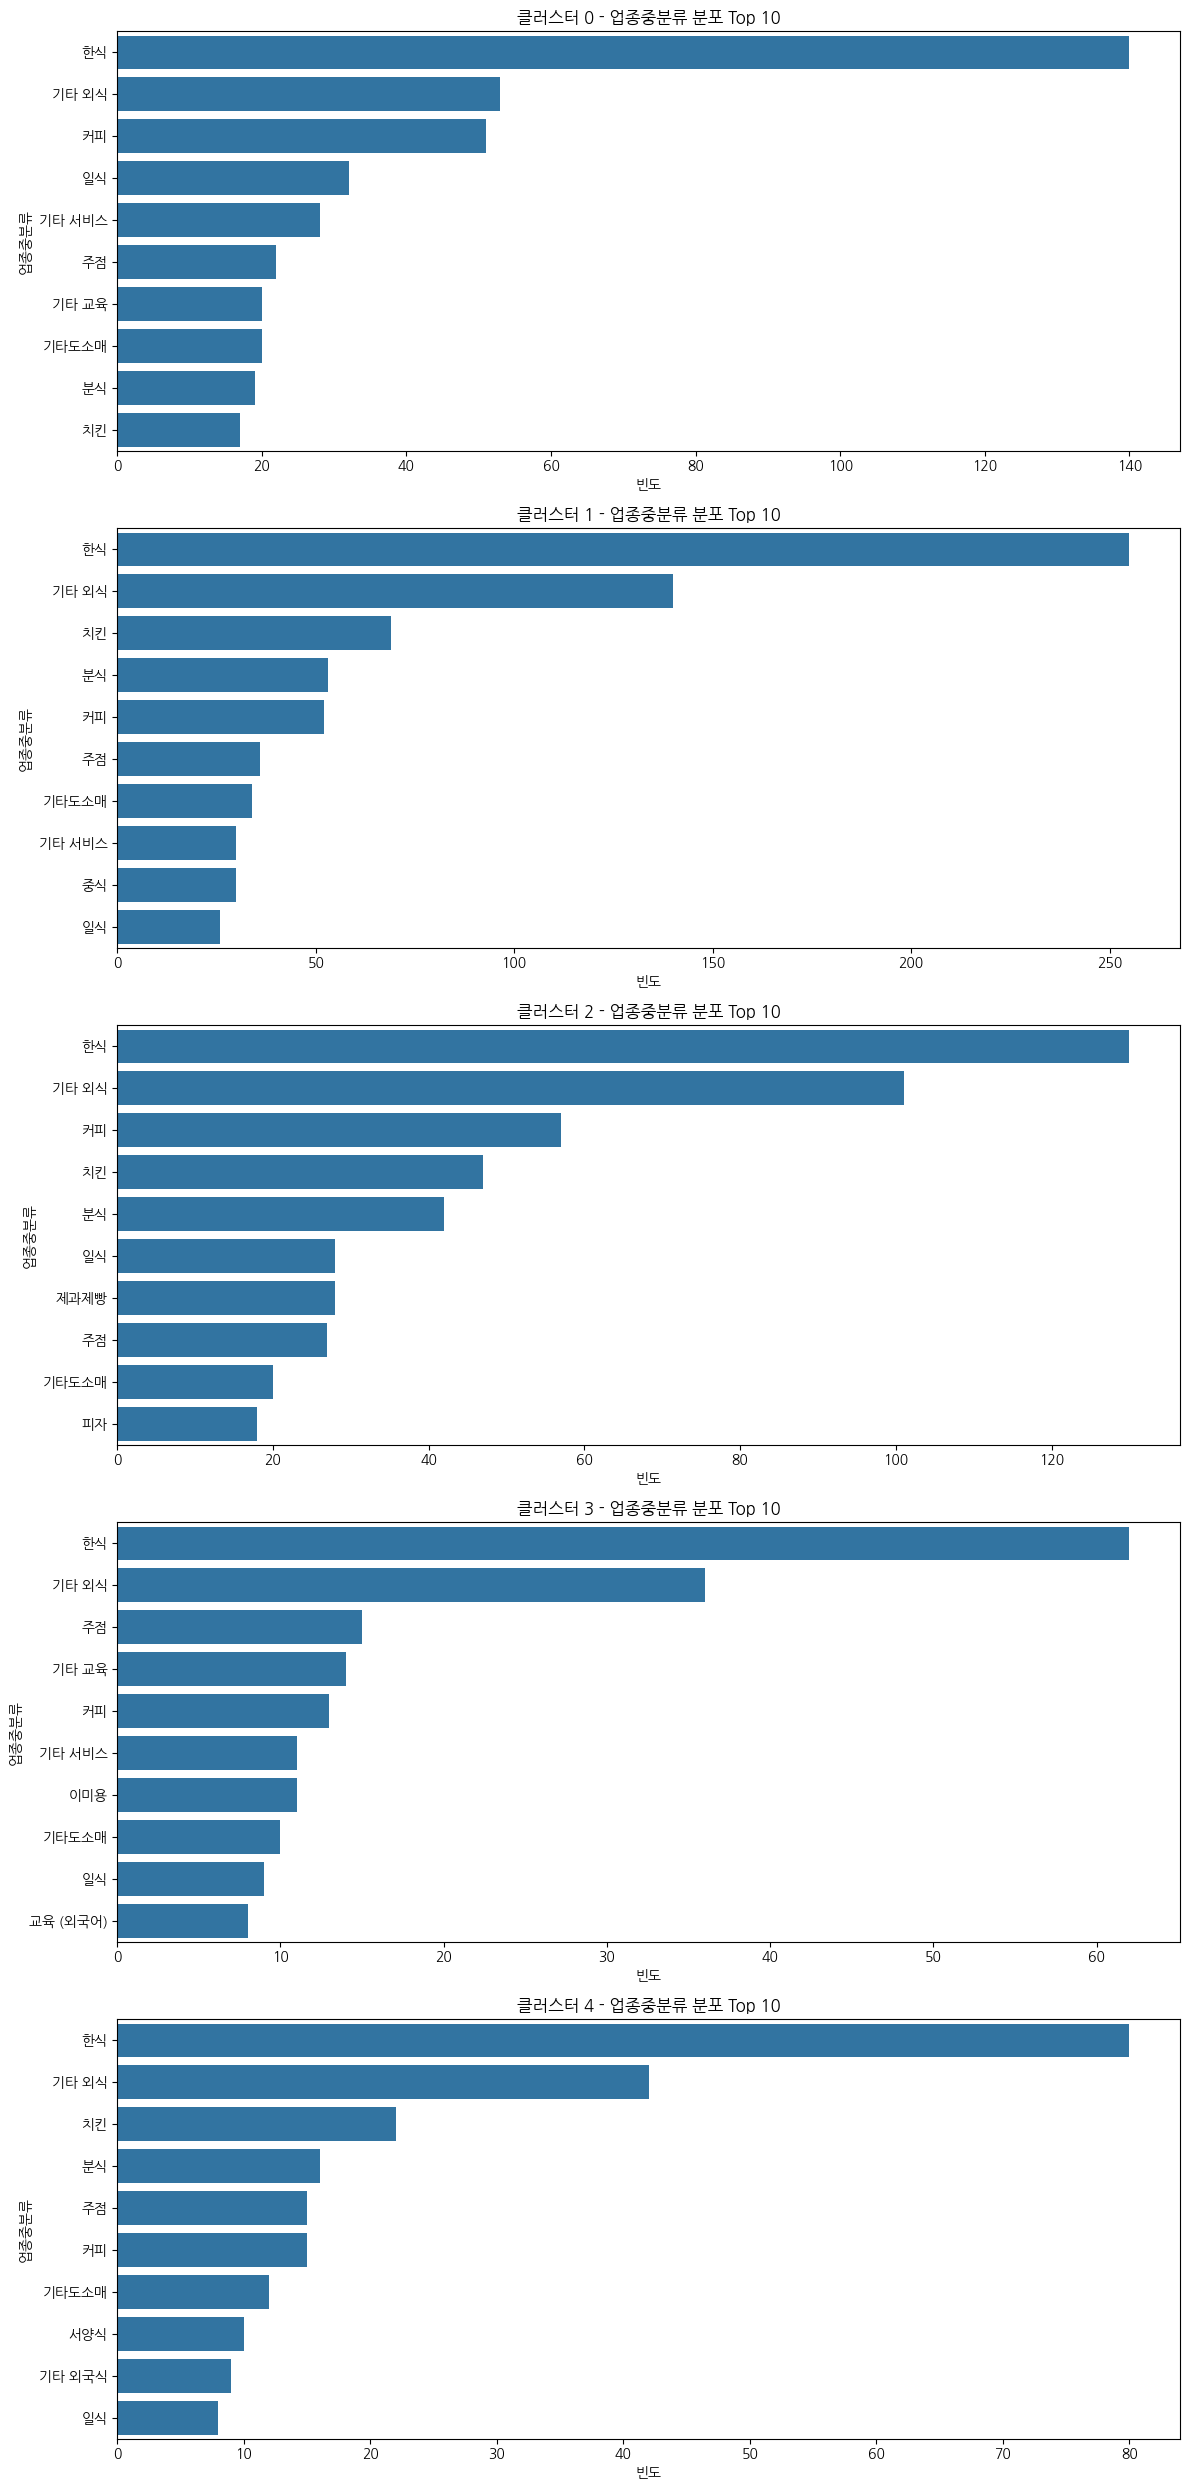

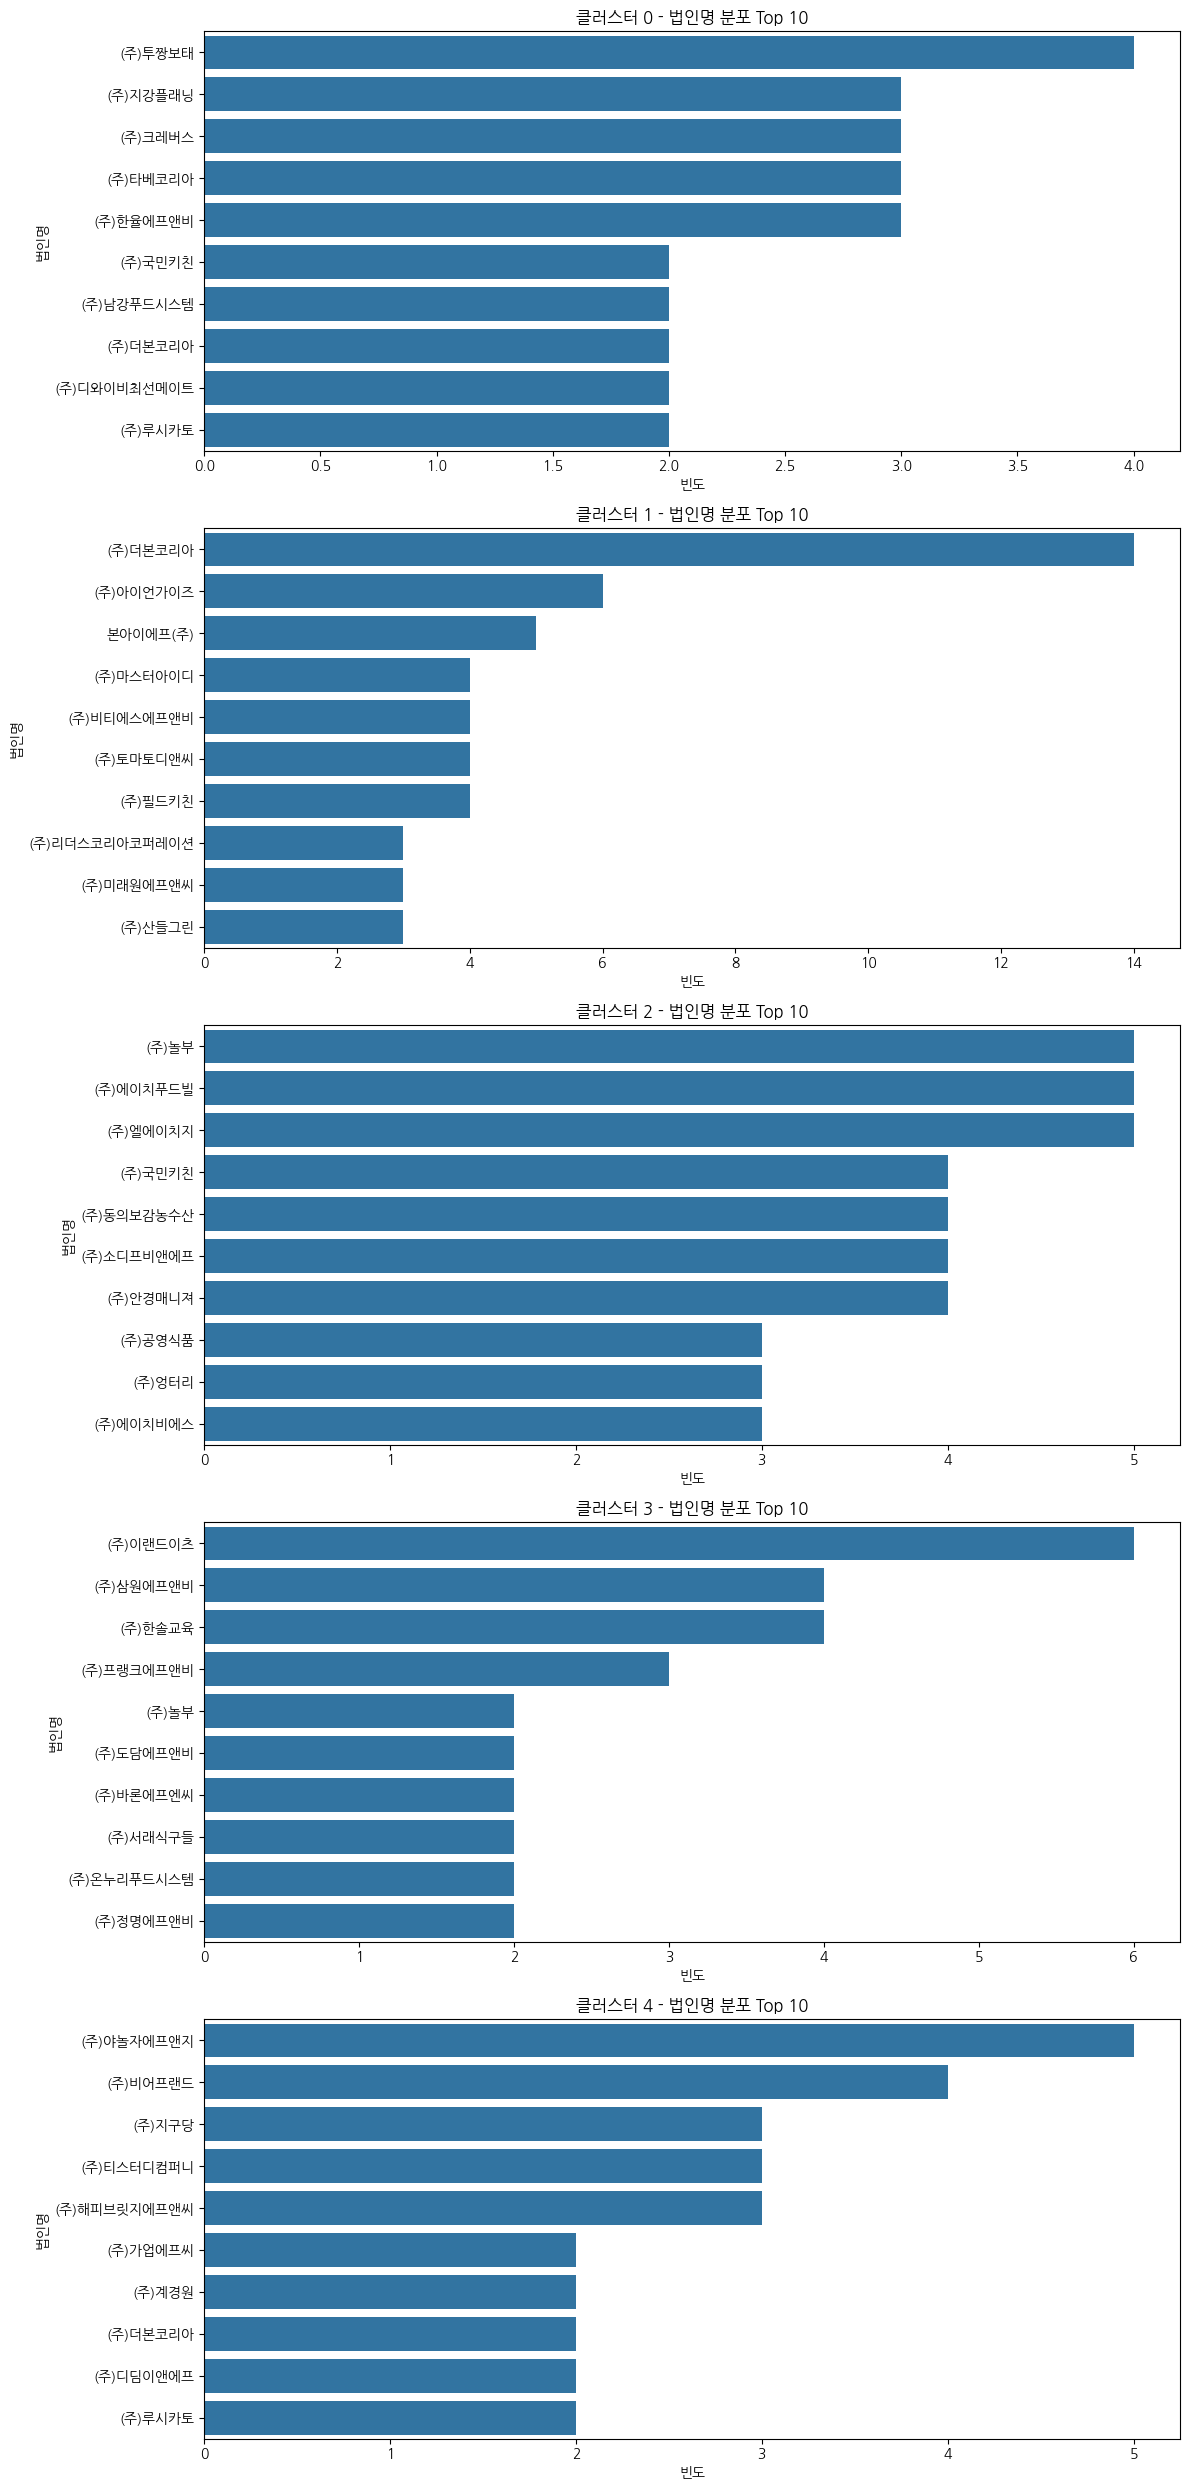

/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_9122/3015185555.py:22: UserWarning: Glyph 8902 (\N{STAR OPERATOR}) missing from font(s) NanumGothic.
  plt.tight_layout()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8902 (\N{STAR OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


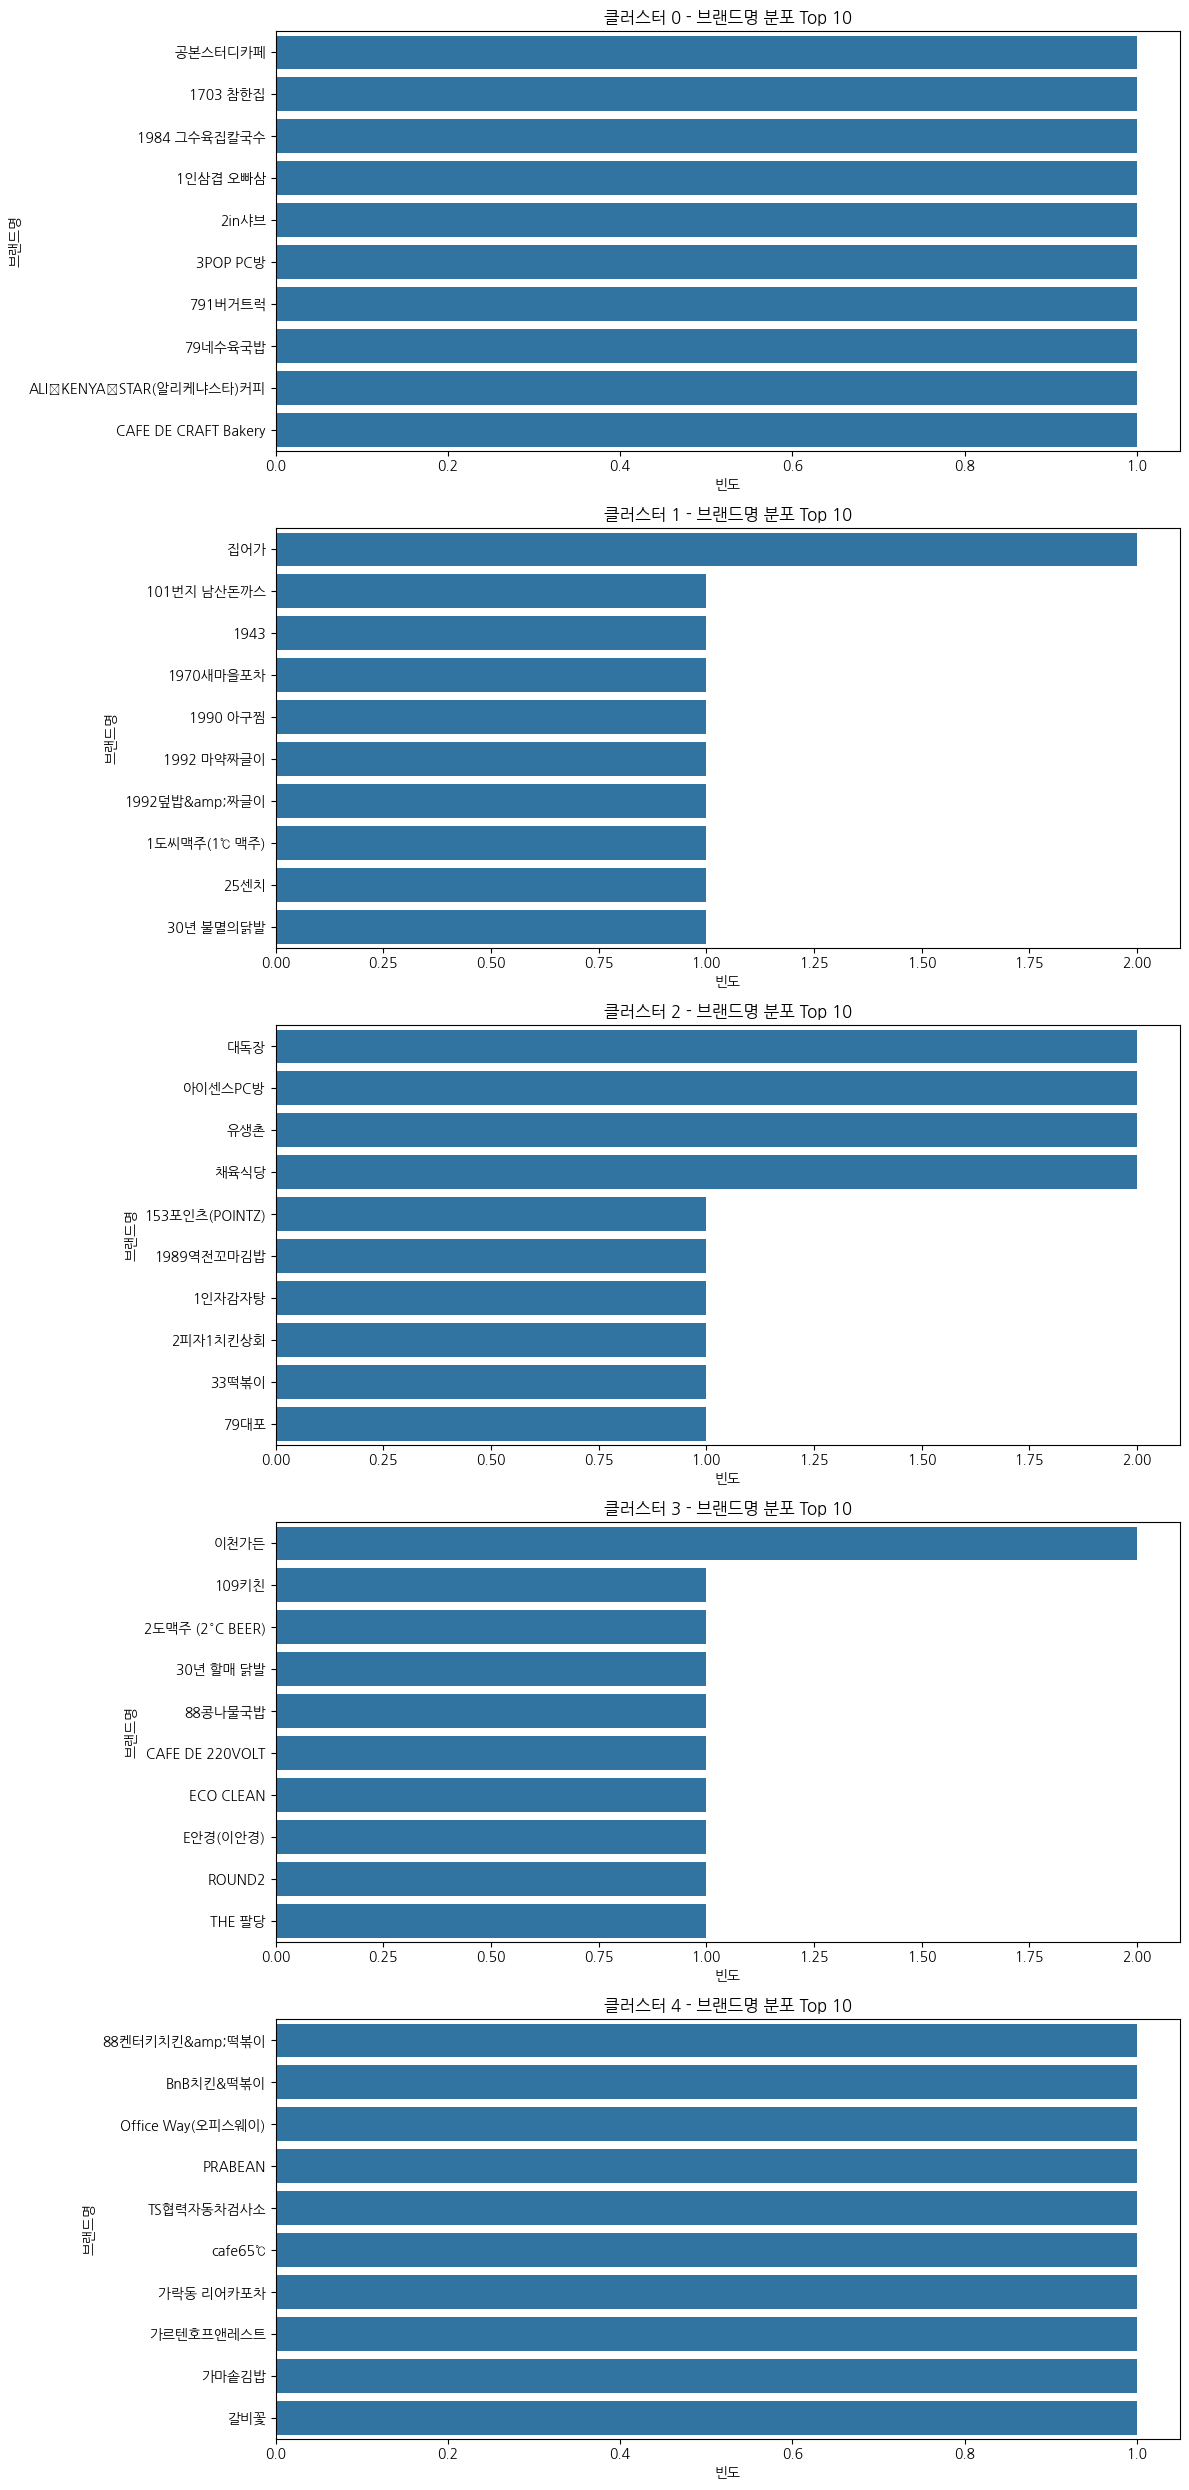

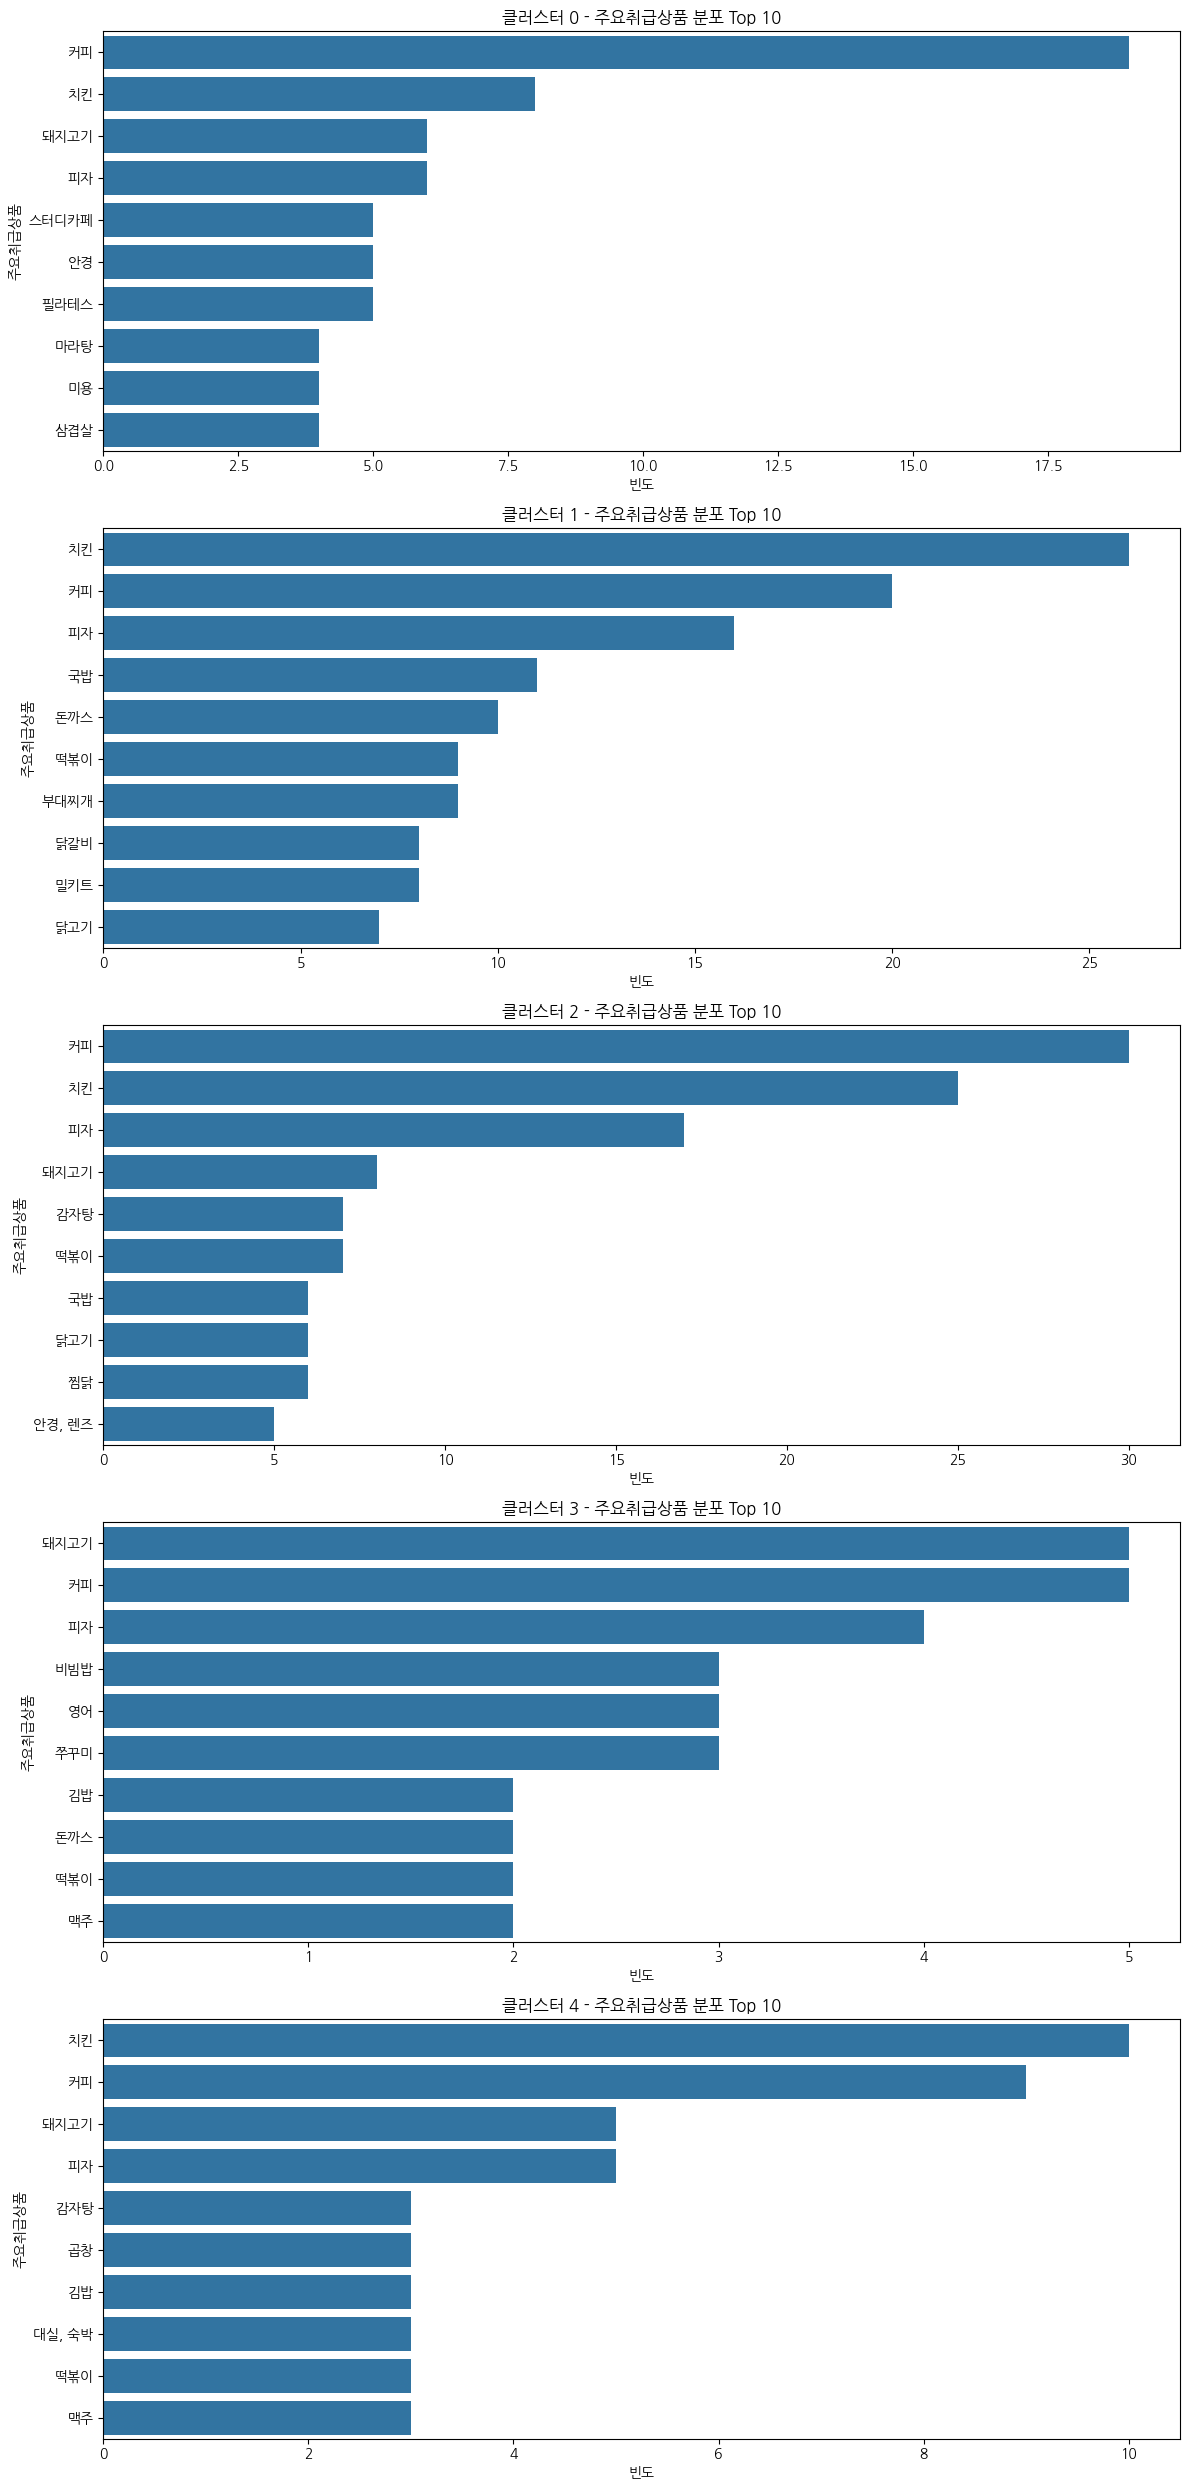

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수 리스트
categorical_columns = ['업종대분류', '업종중분류', '법인명', '브랜드명', '주요취급상품']

# 시각화: 클러스터별 범주형 변수 분포 상위 10개씩
for col in categorical_columns:
    grouped = df.groupby(['클러스터', col]).size().reset_index(name='count')
    
    # 클러스터별로 plot
    unique_clusters = sorted(df['클러스터'].unique())
    fig, axes = plt.subplots(len(unique_clusters), 1, figsize=(12, 5 * len(unique_clusters)), sharex=False)
    
    for i, cluster in enumerate(unique_clusters):
        sub = grouped[grouped['클러스터'] == cluster].nlargest(10, 'count')
        sns.barplot(data=sub, x='count', y=col, ax=axes[i])
        axes[i].set_title(f'클러스터 {cluster} - {col} 분포 Top 10')
        axes[i].set_xlabel('빈도')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()


In [13]:
df.shape

(2728, 32)

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


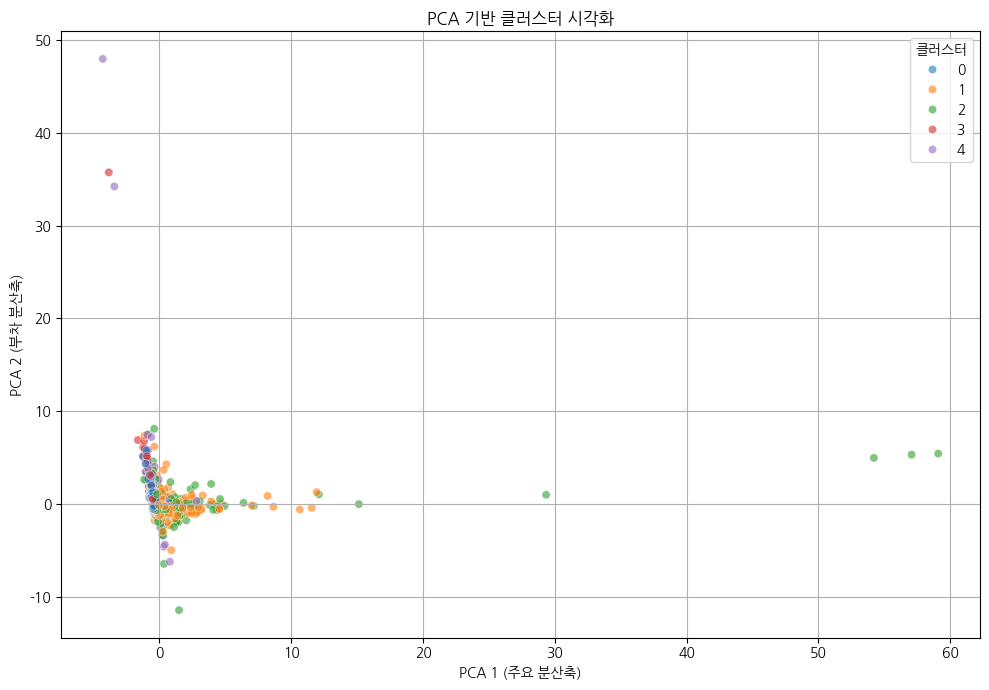

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA에 사용할 수치형 변수 선택
features_for_pca = [
    '가맹점수', '신규가맹점등록수', '계약만료수', '계약해지수', '상호변경수', '연평균매출액',
    '단위면적당평균매출액', '보증금', '교육비', '보험료', '기타비용', '총창업비용',
    '신규가맹점등록비율', '계약종료비율', '계약해지비율', '상호변경비율', '면적당창업비용',
    '수익대비창업비율', '추정폐점수', '폐점율'
]

# 1. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_for_pca])

# 2. PCA 수행 (2차원)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# 3. 결과 저장
df_pca = df[['클러스터']].copy()
df_pca['PCA1'] = pca_result[:, 0]
df_pca['PCA2'] = pca_result[:, 1]

# 4. 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='클러스터', palette='tab10', alpha=0.6)
plt.title('PCA 기반 클러스터 시각화')
plt.xlabel('PCA 1 (주요 분산축)')
plt.ylabel('PCA 2 (부차 분산축)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 클러스터링 결과 평가 기준
- 수치적 차별성: 매출, 창업비용, 폐점율, 효율 등에서 실질적 분포 차이가 존재하는가?

- 산업적 특성: 업종대분류, 중분류, 브랜드에서 구분 가능한 산업군 존재 여부

- 군집 경계성 (PCA 시각화): 시각적으로 군집 간 명확한 경계 또는 중심성 확인 여부

- 의사결정 유용성: 각 클러스터가 전략 수립에 활용 가능한 해석력을 가지는가?



In [ ]:
# 클러스터별 특징 요약
#0	창업비용 중간, 폐점율 0	분식/소형 업종 다수	 효율적이며 리스크 낮음
#1	면적당매출 최고, 창업 효율 낮음	외식 대중 브랜드	수익성은 좋지만 계약 이슈
#2	대형브랜드 집중, 해지율 높음	치킨/피자 등	 해지율 리스크 클러스터
#3	매출 최고, 창업비용 최고, 신규 없음	고가 외식 업종 집중	 프리미엄 안정 브랜드
#4	매출 최하, 폐점율 최고	업종 다양, 구조 분산	 고위험 저성과 클러스터



In [ ]:
# 클러스터별 라벨 정의

cluster_labels = {
    0: '효율성 중심형',
    1: '고효율 매장형',
    2: '대형 프랜차이즈 성장형',
    3: '프리미엄 안정형',
    4: '고위험 저성과형'
}

df['클러스터라벨'] = df['클러스터'].map(cluster_labels)


In [18]:
df.to_csv('./merged_brand_cluster_label.csv', index=False)

### 학습

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   업종대분류       2728 non-null   object 
 1   업종중분류       2728 non-null   object 
 2   법인명         2728 non-null   object 
 3   브랜드명        2728 non-null   object 
 4   가맹점수        2728 non-null   int64  
 5   신규가맹점등록수    2728 non-null   int64  
 6   계약만료수       2728 non-null   int64  
 7   계약해지수       2728 non-null   int64  
 8   상호변경수       2728 non-null   int64  
 9   연평균매출액      2728 non-null   int64  
 10  단위면적당평균매출액  2728 non-null   int64  
 11  보증금         2728 non-null   float64
 12  교육비         2728 non-null   float64
 13  보험료         2728 non-null   float64
 14  기타비용        2728 non-null   float64
 15  총창업비용       2728 non-null   float64
 16  브랜드관리번호     2728 non-null   object 
 17  본사관리번호      2728 non-null   object 
 18  사업자등록번호     2728 non-null   float64
 19  법인등록번호      2728 non-null  

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pandas as pd

In [22]:
df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,...,신규가맹점등록비율,계약종료비율,계약해지비율,상호변경비율,면적당창업비용,수익대비창업비율,추정폐점수,폐점율,클러스터,클러스터라벨
0,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,...,0.428571,0.285714,0.0,0.0,3.248355,0.130654,10,0.285714,1,고효율 매장형
1,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,...,0.250000,0.250000,0.0,0.0,5.287764,0.114568,2,0.250000,1,고효율 매장형
2,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,...,0.176471,0.117647,0.0,0.0,2.958225,0.237321,2,0.117647,1,고효율 매장형
3,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,...,0.062500,0.187500,0.0,0.0,9.074522,0.235882,3,0.187500,1,고효율 매장형
4,외식,한식,(주)동래정에프앤비,동래정 백탄직화,15,14,0,0,0,789601,...,0.933333,0.000000,0.0,0.0,4.419571,0.160271,0,0.000000,0,효율성 중심형


In [ ]:
#  입력데이터 model_input_features = [
    # "총창업비용",          # 사용자 입력
    # "점포면적",            # 사용자 입력
    # "예상매출",            # 사용자 입력 or 업종 평균
    # "업종중분류",          # 선택

In [ ]:
features = [
    "총창업비용",# 사용자 입력
    "보증금", # 사용자 입력
    "업종중분류", # 사용자 입력
     
    


    "가맹점수",
    "신규가맹점등록수",
    "계약해지수",
    "연평균매출액",
    "단위면적당평균매출액",
    "수익대비창업비율",
    "계약종료비율",
    "계약해지비율",
    "면적당창업비용"
]


# 결측치 포함 가능
df = df.dropna(subset=["클러스터라벨"]) 


le = LabelEncoder()
df["클러스터라벨_인코딩"] = le.fit_transform(df["클러스터라벨"])

X = df[features]
y = df["클러스터라벨_인코딩"]

In [29]:
# 피처 타입 구분
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# 전처리기 정의
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}


In [ ]:
# 모델별 파이프라인 학습 및 평가

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=5, scoring="f1_macro")
    print(f"{name} 평균 F1 점수: {scores.mean():.4f}")
    print(f"{name} 평균 정확도: {scores.mean():.4f}")


RandomForest 평균 F1 점수: 0.9997
RandomForest 평균 정확도: 0.9997
LogisticRegression 평균 F1 점수: 0.6713
LogisticRegression 평균 정확도: 0.6713


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:05:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:05:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:05:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [20:05:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

XGBoost 평균 F1 점수: 0.9989
XGBoost 평균 정확도: 0.9989


In [ ]:
best_model = models["XGBoost"]  


pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

pipeline.fit(X, y) 


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:46:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['총창업비용', '보증금', '가맹점수',
                                                   '신규가맹점등록수', '계약해지수',
                                                   '연평균매출액', '단위면적당평균매출액',
                                                   '수익대비창업비율', '계약종료비율',
                                                   '계약해지비율', '면적당창업비용']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:

user_input = pd.DataFrame([{
    "총창업비용": 50000000,  # 사용자 입력
    "보증금": 11000000,       # 사용자 입력
    "업종중분류": "커피" 
                    # 사용자 입력
}])

# 누락된 컬럼 평균값으로 채움
for col in X.columns:
    if col not in user_input.columns:
        user_input[col] = X[col].mean()


user_input = user_input[X.columns]


pred_encoded = pipeline.predict(user_input)[0]
pred_label = le.inverse_transform([pred_encoded])[0]

print(f"예측된 클러스터 라벨: {pred_label}")



예측된 클러스터 라벨: 대형 프랜차이즈 성장형
